<a href="https://colab.research.google.com/github/Alchem1st18/Machine_Learning_models/blob/main/ml_bikerental_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [3]:
dataset_cols = ["bike_count","hour","temp","humidity","wind","visibility","dew","radiation","rain","snow","functional_day"]

In [4]:
df = pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis=1)

In [4]:
df.head()


,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [5]:
df.columns = dataset_cols
df["functional_day"] = (df["functional_day"]=="yes").astype(int)
df = df[df["hour"]==12]
df = df.drop(["hour"],axis=1)

In [6]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew,radiation,rain,snow,functional_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


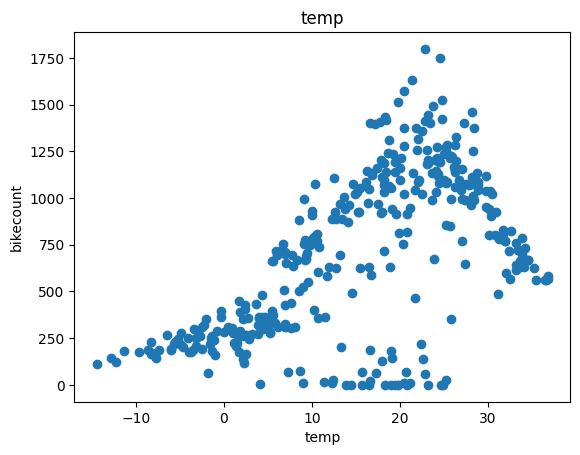

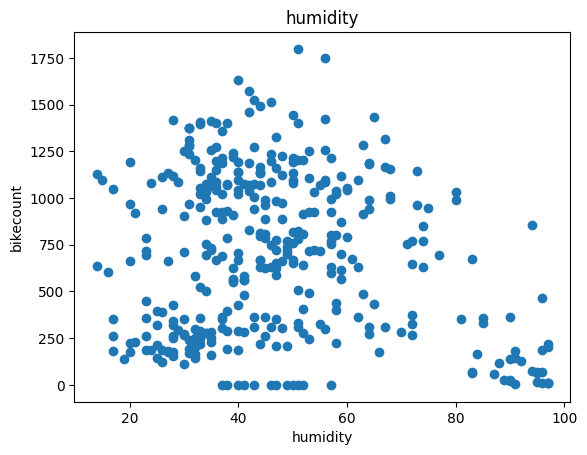

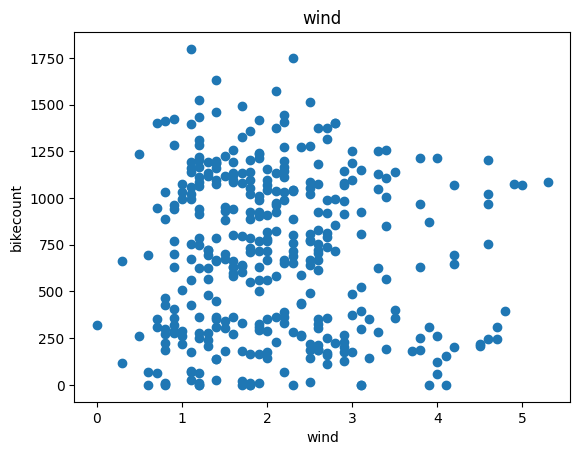

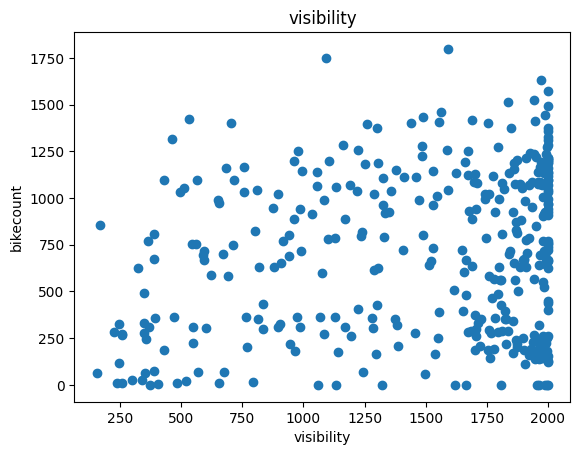

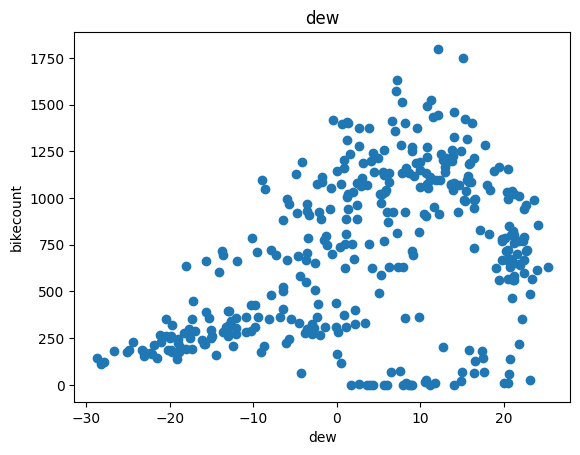

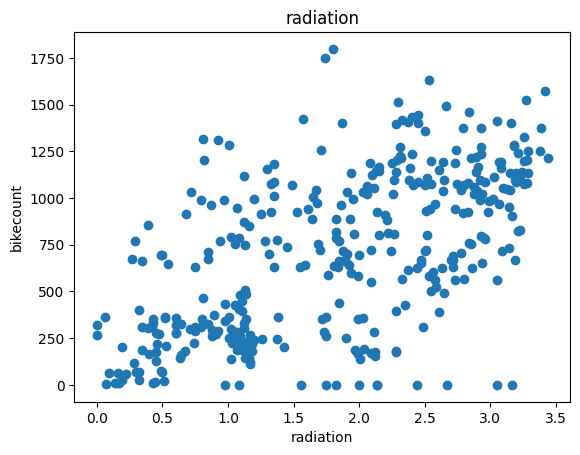

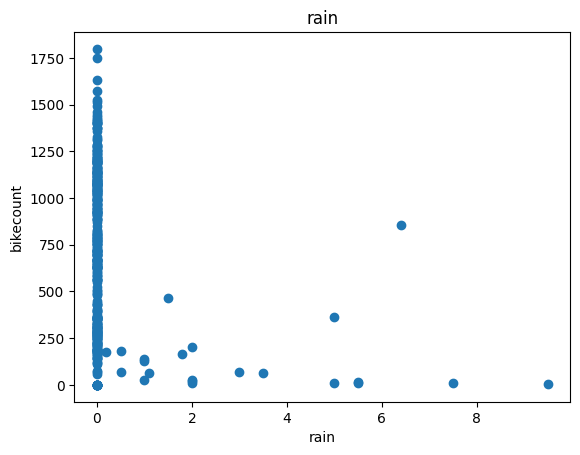

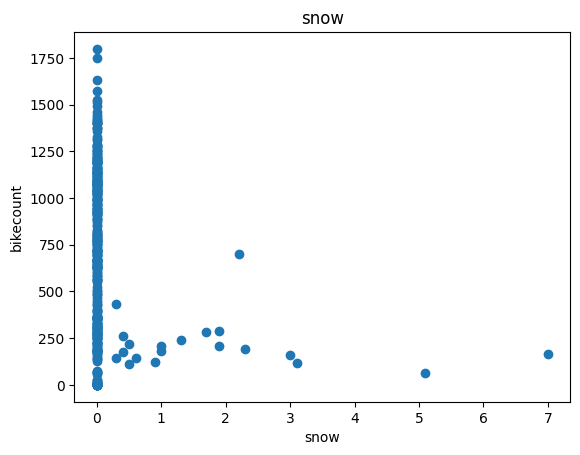

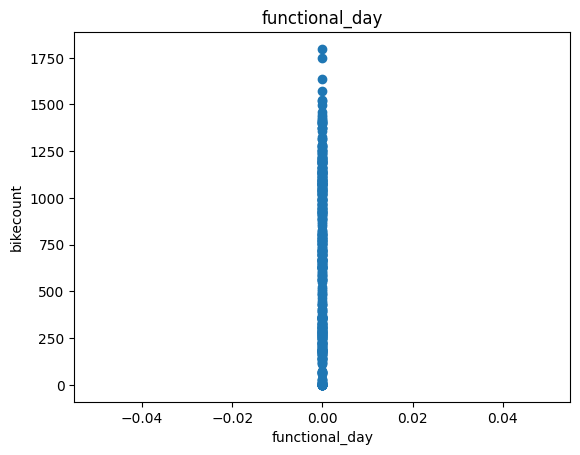

In [5]:
for x in df.columns[1:]:
  plt.scatter(df[x],df["bike_count"])
  plt.title(x)
  plt.ylabel("bikecount")
  plt.xlabel(x)
  plt.show()

In [6]:
df = df.drop(["functional_day","wind","visibility"],axis = 1)

In [9]:
 df.head()

,bike_count,temp,humidity,dew,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Adding training,validate, test data sets

In [7]:
train,validation,test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [8]:
def get_coords(dataframe,y_label,x_label=None):
  dataframe = copy.deepcopy(dataframe)
  if x_label is None:
    x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_label)==1:
      x = dataframe[x_label[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_label].values
  y =dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))

  return data,x,y


In [9]:
_,x_train,y_train = get_coords(train,"bike_count",x_label=["temp"])
_,x_validation,y_validation = get_coords(validation,"bike_count",x_label=["temp"])
_,x_test,y_test = get_coords(test,"bike_count",x_label=["temp"])

In [10]:
len(y_train)

219

In [38]:
len(x_train)

219

In [10]:
temp_regressor = LinearRegression()
temp_regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
print(temp_regressor.coef_,temp_regressor.intercept_)

[[21.3290262]] [397.85672333]


In [12]:
temp_regressor.score(x_test,y_test)

0.22789623071475595

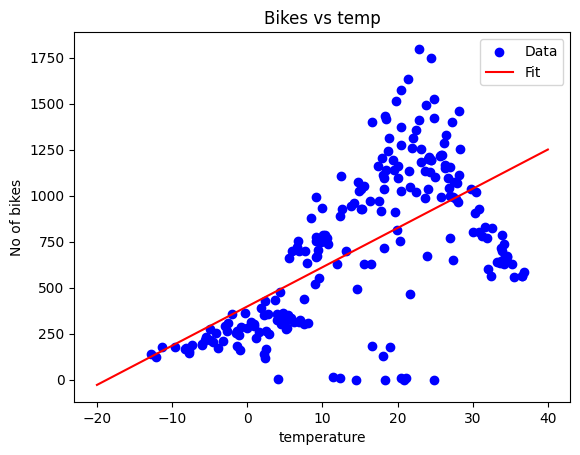

In [13]:
plt.scatter(x_train,y_train,label="Data",color="blue")
x = tf.linspace(-20,40,200)
plt.plot(x,temp_regressor.predict(np.array(x).reshape(-1,1)),label="Fit",color="red")
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("No of bikes")
plt.xlabel("temperature")
plt.show()

Multiple Linear Regression

In [20]:
_,x_train,y_train = get_coords(train,"bike_count",x_label=df.columns[1:])
_,x_validation,y_validation = get_coords(validation,"bike_count",x_label=df.columns[1:])
_,x_test,y_test = get_coords(test,"bike_count",x_label=df.columns[1:])

In [40]:
len(x_train)

219

In [41]:
len(y_train)

219

In [21]:
all_regressor = LinearRegression()
all_regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
all_regressor.score(x_test,y_test)

0.42681661999575504

Regression with Neural Nets

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [19]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis = None)
temp_normalizer.adapt(x_train.reshape(-1))

In [42]:
len(x_train)

219

In [43]:
len(y_train)

219

In [44]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [45]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [47]:
history = temp_nn_model.fit(
    x_train.reshape(-1),y_train,
    verbose=0,
    epochs=1000,
    validation_data = (x_validation,y_validation)
)


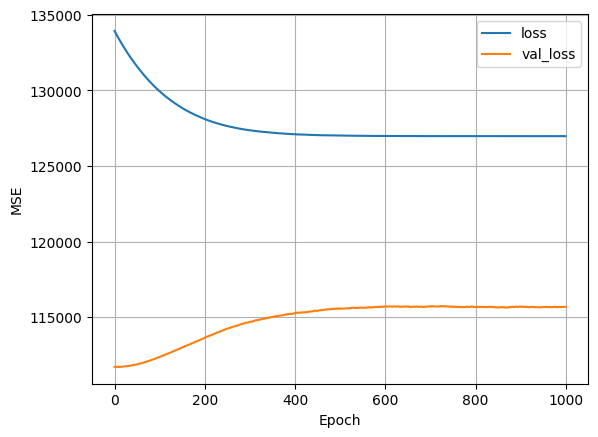

In [48]:
plot_loss(history)

7/7 [==============================] - 0s 3ms/step


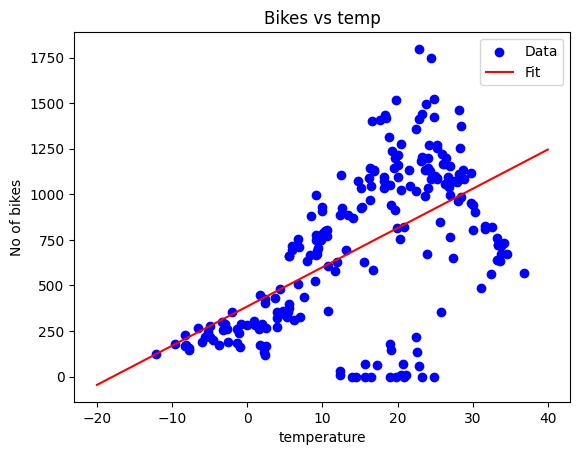

In [49]:
plt.scatter(x_train,y_train,label="Data",color="blue")
x = tf.linspace(-20,40,200)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red")
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("No of bikes")
plt.xlabel("temperature")
plt.show()

Neural Net

In [55]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train.reshape(-1))

fin_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
fin_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [56]:
history = fin_nn_model.fit(
    x_train,y_train,
    validation_data=(x_validation,y_validation),
    verbose = 0,
    epochs = 100

)

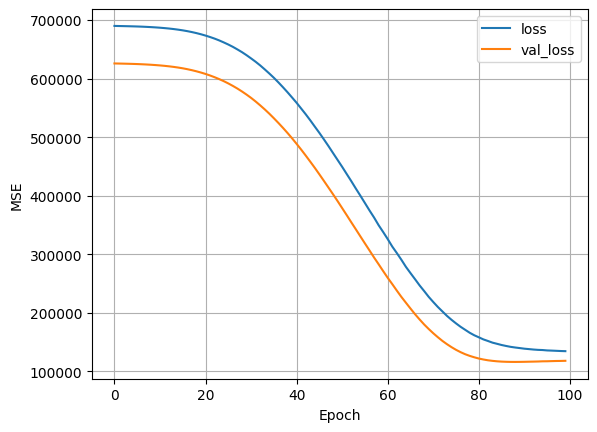

In [57]:
plot_loss(history)

7/7 [==============================] - 0s 12ms/step


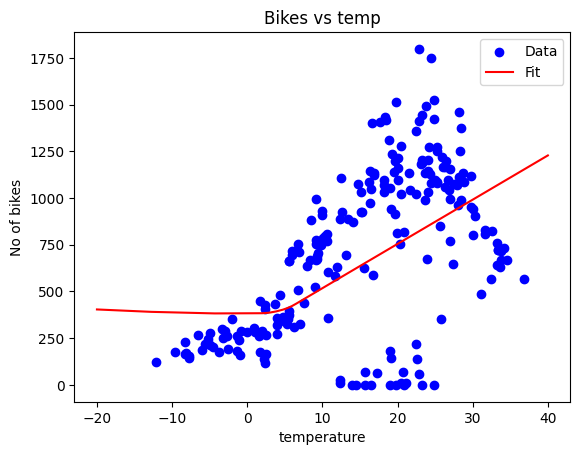

In [54]:
plt.scatter(x_train,y_train,label="Data",color="blue")
x = tf.linspace(-20,40,200)
plt.plot(x,fin_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red")
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("No of bikes")
plt.xlabel("temperature")
plt.show()

In [28]:
complete_normalizer = tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
complete_normalizer.adapt(x_train)



In [29]:
nn_model = tf.keras.Sequential([
    complete_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [30]:
history = nn_model.fit(
    x_train,y_train,
    validation_data=(x_validation,y_validation),
    verbose = 0,
    epochs = 100

)

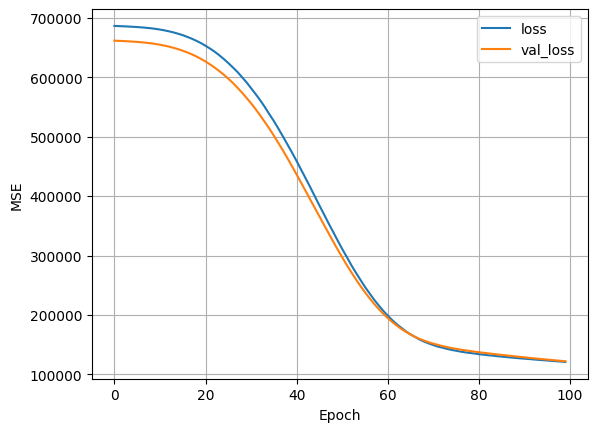

In [31]:
plot_loss(history)

Comparing Mean Squared Error for Linear Regression and Neural Net

In [32]:
predict_lr = all_regressor.predict(x_test)
predict_nn = nn_model.predict(x_test)

3/3 [==============================] - 0s 5ms/step


In [33]:
def MSE(predict_val,real_val):
  return (np.square(predict_val-real_val)).mean()


In [34]:
MSE(predict_lr,y_test)

103700.53351360536

In [35]:
MSE(predict_nn,y_test)

137217.4106186478

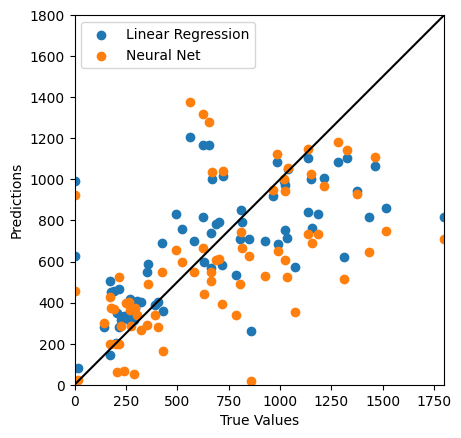

In [45]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test,predict_lr,label="Linear Regression")
plt.scatter(y_test,predict_nn,label="Neural Net")
plt.xlabel("True Values")
plt.ylabel("Predictions")
limits = [0,1800]
plt.xlim(limits)
plt.ylim(limits)
plt.legend()
plt.plot(limits,limits,c="black")